<a href="https://colab.research.google.com/github/SoundaryaDube/Predictive-Analysis/blob/main/HealthHack_Diabetic_Retinopathy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import zipfile
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Input
import os

In [ ]:
# Path to the ZIP file
zip_path = "/content/drive/MyDrive/B. Disease Grading.zip"

# Open the ZIP file and list its contents
with zipfile.ZipFile(zip_path, 'r') as z:
    print("Files inside ZIP:", z.namelist())  # List all files inside ZIP

Files inside ZIP: ['B. Disease Grading/', 'B. Disease Grading/1. Original Images/', 'B. Disease Grading/1. Original Images/a. Training Set/', 'B. Disease Grading/1. Original Images/a. Training Set/IDRiD_001.jpg', 'B. Disease Grading/1. Original Images/a. Training Set/IDRiD_002.jpg', 'B. Disease Grading/1. Original Images/a. Training Set/IDRiD_003.jpg', 'B. Disease Grading/1. Original Images/a. Training Set/IDRiD_004.jpg', 'B. Disease Grading/1. Original Images/a. Training Set/IDRiD_005.jpg', 'B. Disease Grading/1. Original Images/a. Training Set/IDRiD_006.jpg', 'B. Disease Grading/1. Original Images/a. Training Set/IDRiD_007.jpg', 'B. Disease Grading/1. Original Images/a. Training Set/IDRiD_008.jpg', 'B. Disease Grading/1. Original Images/a. Training Set/IDRiD_009.jpg', 'B. Disease Grading/1. Original Images/a. Training Set/IDRiD_010.jpg', 'B. Disease Grading/1. Original Images/a. Training Set/IDRiD_011.jpg', 'B. Disease Grading/1. Original Images/a. Training Set/IDRiD_012.jpg', 'B. Di

In [ ]:
with zipfile.ZipFile(zip_path, 'r') as z:
    file_name = z.namelist()[0]  # Change index if needed
    with z.open(file_name) as f:
        content = f.read()
        print("File content preview:", content[:500])  # Preview first 500 bytes

File content preview: b''


In [ ]:
with zipfile.ZipFile(zip_path, 'r') as z:
    file_list = z.namelist()
    print("Files inside ZIP:", file_list)

    # Check file sizes
    for file in file_list:
        with z.open(file) as f:
            content = f.read()
            print(f"{file} - Size: {len(content)} bytes")

Files inside ZIP: ['B. Disease Grading/', 'B. Disease Grading/1. Original Images/', 'B. Disease Grading/1. Original Images/a. Training Set/', 'B. Disease Grading/1. Original Images/a. Training Set/IDRiD_001.jpg', 'B. Disease Grading/1. Original Images/a. Training Set/IDRiD_002.jpg', 'B. Disease Grading/1. Original Images/a. Training Set/IDRiD_003.jpg', 'B. Disease Grading/1. Original Images/a. Training Set/IDRiD_004.jpg', 'B. Disease Grading/1. Original Images/a. Training Set/IDRiD_005.jpg', 'B. Disease Grading/1. Original Images/a. Training Set/IDRiD_006.jpg', 'B. Disease Grading/1. Original Images/a. Training Set/IDRiD_007.jpg', 'B. Disease Grading/1. Original Images/a. Training Set/IDRiD_008.jpg', 'B. Disease Grading/1. Original Images/a. Training Set/IDRiD_009.jpg', 'B. Disease Grading/1. Original Images/a. Training Set/IDRiD_010.jpg', 'B. Disease Grading/1. Original Images/a. Training Set/IDRiD_011.jpg', 'B. Disease Grading/1. Original Images/a. Training Set/IDRiD_012.jpg', 'B. Di

In [ ]:
!unzip '/content/drive/MyDrive/B. Disease Grading.zip' -d '/content/extracted'

Archive:  /content/drive/MyDrive/B. Disease Grading.zip
replace /content/extracted/B. Disease Grading/1. Original Images/a. Training Set/IDRiD_001.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
# Define image size & batch size
IMG_SIZE = (224, 224)
BATCH_SIZE = 32

# Define dataset path
train_dir = '/content/extracted/B. Disease Grading/1. Original Images/a. Training Set'
valid_dir = '/content/extracted/B. Disease Grading/1. Original Images/b. Testing Set'  # If validation images exist

In [ ]:
print(os.listdir(train_dir))

['IDRiD_344.jpg', 'IDRiD_149.jpg', 'IDRiD_079.jpg', 'IDRiD_006.jpg', 'IDRiD_150.jpg', 'IDRiD_283.jpg', 'IDRiD_122.jpg', 'IDRiD_248.jpg', 'IDRiD_067.jpg', 'IDRiD_099.jpg', 'IDRiD_389.jpg', 'IDRiD_211.jpg', 'IDRiD_120.jpg', 'IDRiD_396.jpg', 'IDRiD_089.jpg', 'IDRiD_347.jpg', 'IDRiD_102.jpg', 'IDRiD_327.jpg', 'IDRiD_105.jpg', 'IDRiD_104.jpg', 'IDRiD_194.jpg', 'IDRiD_357.jpg', 'IDRiD_239.jpg', 'IDRiD_190.jpg', 'IDRiD_195.jpg', 'IDRiD_192.jpg', 'IDRiD_296.jpg', 'IDRiD_241.jpg', 'IDRiD_345.jpg', 'IDRiD_197.jpg', 'IDRiD_339.jpg', 'IDRiD_303.jpg', 'IDRiD_235.jpg', 'IDRiD_200.jpg', 'IDRiD_219.jpg', 'IDRiD_087.jpg', 'IDRiD_234.jpg', 'IDRiD_355.jpg', 'IDRiD_321.jpg', 'IDRiD_253.jpg', 'IDRiD_193.jpg', 'IDRiD_246.jpg', 'IDRiD_405.jpg', 'IDRiD_071.jpg', 'IDRiD_272.jpg', 'IDRiD_196.jpg', 'IDRiD_137.jpg', 'IDRiD_179.jpg', 'IDRiD_110.jpg', 'IDRiD_315.jpg', 'IDRiD_214.jpg', 'IDRiD_384.jpg', 'IDRiD_271.jpg', 'IDRiD_285.jpg', 'IDRiD_277.jpg', 'IDRiD_154.jpg', 'IDRiD_273.jpg', 'IDRiD_010.jpg', 'IDRiD_153.jp

In [ ]:
# Define the model architecture
base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False

In [ ]:
inputs = Input(shape=(224, 224, 3))
x = base_model(inputs)
x = Flatten()(x)

In [ ]:
# Model Architecture
model = Sequential([
    base_model,
    Flatten(),
    Dense(128, activation='relu'),
    Dense(5, activation='softmax')  # 5 classes for disease grading
])

In [ ]:
# Compile the model
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
os.listdir('/content/extracted/B. Disease Grading/1. Original Images/a. Training Set')  # Check contents of the training folder
os.listdir('/content/extracted/B. Disease Grading/1. Original Images/b. Testing Set')  # Check contents of the validation folder

['IDRiD_079.jpg',
 'IDRiD_006.jpg',
 'IDRiD_067.jpg',
 'IDRiD_099.jpg',
 'IDRiD_089.jpg',
 'IDRiD_102.jpg',
 'IDRiD_087.jpg',
 'IDRiD_071.jpg',
 'IDRiD_010.jpg',
 'IDRiD_091.jpg',
 'IDRiD_011.jpg',
 'IDRiD_015.jpg',
 'IDRiD_065.jpg',
 'IDRiD_021.jpg',
 'IDRiD_002.jpg',
 'IDRiD_004.jpg',
 'IDRiD_026.jpg',
 'IDRiD_022.jpg',
 'IDRiD_048.jpg',
 'IDRiD_070.jpg',
 'IDRiD_017.jpg',
 'IDRiD_018.jpg',
 'IDRiD_078.jpg',
 'IDRiD_001.jpg',
 'IDRiD_053.jpg',
 'IDRiD_040.jpg',
 'IDRiD_014.jpg',
 'IDRiD_057.jpg',
 'IDRiD_019.jpg',
 'IDRiD_075.jpg',
 'IDRiD_038.jpg',
 'IDRiD_093.jpg',
 'IDRiD_016.jpg',
 'IDRiD_058.jpg',
 'IDRiD_068.jpg',
 'IDRiD_088.jpg',
 'IDRiD_063.jpg',
 'IDRiD_101.jpg',
 'IDRiD_069.jpg',
 'IDRiD_025.jpg',
 'IDRiD_084.jpg',
 'IDRiD_034.jpg',
 'IDRiD_033.jpg',
 'IDRiD_009.jpg',
 'IDRiD_020.jpg',
 'IDRiD_086.jpg',
 'IDRiD_052.jpg',
 'IDRiD_095.jpg',
 'IDRiD_024.jpg',
 'IDRiD_043.jpg',
 'IDRiD_055.jpg',
 'IDRiD_046.jpg',
 'IDRiD_083.jpg',
 'IDRiD_054.jpg',
 'IDRiD_098.jpg',
 'IDRiD_05

In [ ]:
# List the files in the training directory
train_files = os.listdir('/content/extracted/B. Disease Grading/1. Original Images/a. Training Set')
valid_files = os.listdir('/content/extracted/B. Disease Grading/1. Original Images/b. Testing Set')

print("Training files:", train_files)
print("Validation files:", valid_files)

Training files: ['IDRiD_344.jpg', 'IDRiD_149.jpg', 'IDRiD_079.jpg', 'IDRiD_006.jpg', 'IDRiD_150.jpg', 'IDRiD_283.jpg', 'IDRiD_122.jpg', 'IDRiD_248.jpg', 'IDRiD_067.jpg', 'IDRiD_099.jpg', 'IDRiD_389.jpg', 'IDRiD_211.jpg', 'IDRiD_120.jpg', 'IDRiD_396.jpg', 'IDRiD_089.jpg', 'IDRiD_347.jpg', 'IDRiD_102.jpg', 'IDRiD_327.jpg', 'IDRiD_105.jpg', 'IDRiD_104.jpg', 'IDRiD_194.jpg', 'IDRiD_357.jpg', 'IDRiD_239.jpg', 'IDRiD_190.jpg', 'IDRiD_195.jpg', 'IDRiD_192.jpg', 'IDRiD_296.jpg', 'IDRiD_241.jpg', 'IDRiD_345.jpg', 'IDRiD_197.jpg', 'IDRiD_339.jpg', 'IDRiD_303.jpg', 'IDRiD_235.jpg', 'IDRiD_200.jpg', 'IDRiD_219.jpg', 'IDRiD_087.jpg', 'IDRiD_234.jpg', 'IDRiD_355.jpg', 'IDRiD_321.jpg', 'IDRiD_253.jpg', 'IDRiD_193.jpg', 'IDRiD_246.jpg', 'IDRiD_405.jpg', 'IDRiD_071.jpg', 'IDRiD_272.jpg', 'IDRiD_196.jpg', 'IDRiD_137.jpg', 'IDRiD_179.jpg', 'IDRiD_110.jpg', 'IDRiD_315.jpg', 'IDRiD_214.jpg', 'IDRiD_384.jpg', 'IDRiD_271.jpg', 'IDRiD_285.jpg', 'IDRiD_277.jpg', 'IDRiD_154.jpg', 'IDRiD_273.jpg', 'IDRiD_010.jpg

In [ ]:
import os
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

# Define image paths and labels
train_dir = '/content/extracted/B. Disease Grading/1. Original Images/a. Training Set'
valid_dir = '/content/extracted/B. Disease Grading/1. Original Images/b. Testing Set'

train_files = os.listdir(train_dir)
valid_files = os.listdir(valid_dir)

# list of image paths (use actual paths and labels)
train_image_paths = [os.path.join(train_dir, file) for file in train_files]
valid_image_paths = [os.path.join(valid_dir, file) for file in valid_files]

# Assuming labels are predefined or extracted (e.g., 0, 1, 2 for classes)
train_labels = [np.random.randint(0, 5) for _ in range(len(train_image_paths))]
valid_labels = [np.random.randint(0, 5) for _ in range(len(valid_image_paths))]

df_train = pd.DataFrame({'file': train_image_paths, 'label': [str(label) for label in train_labels]})
df_valid = pd.DataFrame({'file': valid_image_paths, 'label': [str(label) for label in valid_labels]})


In [ ]:
import tensorflow as tf
import os

# Paths to the dataset
train_dir = '/content/extracted/B. Disease Grading/1. Original Images/a. Training Set'
valid_dir = '/content/extracted/B. Disease Grading/1. Original Images/b. Testing Set'

def load_image(file_path):
    image = tf.io.read_file(file_path)
    image = tf.image.decode_jpeg(image, channels=3)
    image = tf.image.resize(image, [224, 224])
    image = image / 255.0  # Normalize
    return image

def create_dataset(data_dir):
    file_paths = [os.path.join(data_dir, fname) for fname in os.listdir(data_dir)]
    train_labels = [np.random.randint(0, 5) for _ in range(len(train_image_paths))]
    valid_labels = [np.random.randint(0, 5) for _ in range(len(valid_image_paths))]
    path_ds = tf.data.Dataset.from_tensor_slices(file_paths)
    image_ds = path_ds.map(load_image)
    train_labels_ds = tf.data.Dataset.from_tensor_slices(train_labels)
    valid_labels_ds = tf.data.Dataset.from_tensor_slices(valid_labels)
    return tf.data.Dataset.zip((image_ds, train_labels_ds, valid_labels_ds))

train_data = create_dataset(train_dir)
valid_data = create_dataset(valid_dir)

# Set batch size
train_data = train_data.batch(32)
valid_data = valid_data.batch(32)


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255, rotation_range=20, horizontal_flip=True)
valid_datagen = ImageDataGenerator(rescale=1./255)
# Ensure categorical labels are correctly handled by `flow_from_dataframe`
train_data = train_datagen.flow_from_dataframe(
    dataframe=df_train,
    directory=None,
    x_col='file',
    y_col='label',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'  # Automatically handles one-hot encoding
)

valid_data = valid_datagen.flow_from_dataframe(
    dataframe=df_valid,
    directory=None,
    x_col='file',
    y_col='label',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'  # Automatically handles one-hot encoding
)


Found 413 validated image filenames belonging to 5 classes.
Found 103 validated image filenames belonging to 5 classes.


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Define the model
model = Sequential([
    EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224, 224, 3)),
    Flatten(),
    Dropout(0.5),  # Dropout to reduce overfitting
    Dense(128, activation='relu'),
    Dropout(0.5),  # Another Dropout layer
    Dense(5, activation='softmax')  # Assuming 5 classes for disease grading
])

# Compile the model
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with early stopping
model.fit(train_data, epochs=10, validation_data=valid_data,
          steps_per_epoch=len(train_data), validation_steps=len(valid_data),
          callbacks=[early_stopping])


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 129s 8s/step - accuracy: 0.2004 - loss: 4.2057 - val_accuracy: 0.2136 - val_loss: 1.7717
Epoch 2/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 83s 6s/step - accuracy: 0.2115 - loss: 1.6405 - val_accuracy: 0.1650 - val_loss: 1.6108
Epoch 3/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 143s 6s/step - accuracy: 0.1926 - loss: 1.6165 - val_accuracy: 0.1650 - val_loss: 1.6131
Epoch 4/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 83s 6s/step - accuracy: 0.2158 - loss: 1.6112 - val_accuracy: 0.1650 - val_loss: 1.6095
Epoch 5/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 139s 6s/step - accuracy: 0.2421 - loss: 1.5974 - val_accuracy: 0.2136 - val_loss: 1.6098
Epoch 6/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 84s 6s/step - accuracy: 0.2531 - loss: 1.6171 - val_accuracy: 0.2427 - val_loss: 1.6084
Epoch 7/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 147s 6s/step - accuracy: 0.2127 - loss: 1.6082 - val_accuracy: 0.2427 - val_loss: 1.6083
Epoch 8/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 82s 6s/step - accuracy: 0.2105 - loss: 1.6093 - val_accuracy: 0.2427 - val_l

In [ ]:
# Evaluate model on the validation dataset
val_loss, val_accuracy = model.evaluate(valid_data)
print(f"Validation Loss: {val_loss}")
print(f"Validation Accuracy: {val_accuracy}")

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


4/4 ━━━━━━━━━━━━━━━━━━━━ 12s 1s/step - accuracy: 0.1826 - loss: 1.6922
Validation Loss: 1.6712812185287476
Validation Accuracy: 0.20388349890708923


In [ ]:
# Save Model
model.save("diabetic_retinopathy_model.keras")

In [ ]:
history = model.fit(train_data, epochs=10, validation_data=valid_data,
                    steps_per_epoch=len(train_data), validation_steps=len(valid_data))


Epoch 1/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 53s 3s/step - accuracy: 0.2063 - loss: 13.6029 - val_accuracy: 0.1845 - val_loss: 2.8636
Epoch 2/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 76s 3s/step - accuracy: 0.2155 - loss: 3.2416 - val_accuracy: 0.1845 - val_loss: 2.5534
Epoch 3/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 40s 3s/step - accuracy: 0.1843 - loss: 2.4044 - val_accuracy: 0.1845 - val_loss: 2.0186
Epoch 4/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 37s 3s/step - accuracy: 0.1560 - loss: 2.0490 - val_accuracy: 0.1845 - val_loss: 2.2303
Epoch 5/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 42s 3s/step - accuracy: 0.2013 - loss: 1.9775 - val_accuracy: 0.1845 - val_loss: 1.9557
Epoch 6/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 42s 3s/step - accuracy: 0.1737 - loss: 2.0747 - val_accuracy: 0.1845 - val_loss: 2.4888
Epoch 7/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 39s 3s/step - accuracy: 0.1886 - loss: 2.0995 - val_accuracy: 0.2427 - val_loss: 1.6228
Epoch 8/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 40s 3s/step - accuracy: 0.2373 - loss: 1.9833 - val_accuracy: 0.1845 - val_loss

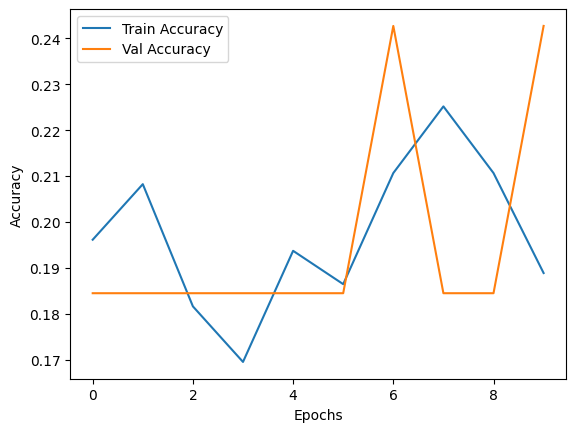

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Example: Visualize training and validation accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
import tensorflow as tf

# Load and preprocess the image
image_path = '/content/extracted/B. Disease Grading/1. Original Images/b. Testing Set/IDRiD_086.jpg'  # Assuming the image is in the current directory
image = tf.keras.preprocessing.image.load_img(image_path, target_size=(224, 224))  # Resize to match model input
image = tf.keras.preprocessing.image.img_to_array(image)
image = tf.expand_dims(image, axis=0)  # Add batch dimension

# Make predictions
predictions = model.predict(image)

# Output the raw predictions (class probabilities)
print("Predictions (raw probabilities):", predictions)

# If your model is for classification, get the predicted class index
predicted_class_index = np.argmax(predictions, axis=1).item()  # Get the predicted class index

# Get the class labels from the training data
class_labels = list(valid_data.class_indices.keys())  # Use the class labels from the validation data generator

# Map the predicted class index to the class label
predicted_class_label = class_labels[predicted_class_index]

# Display the predicted class label
print(f"Predicted Class Index: {predicted_class_index}")
print(f"Predicted Class Label: {predicted_class_label}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Predictions (raw probabilities): [[0.11952882 0.09037903 0.36280292 0.2582797  0.16900957]]
Predicted Class Index: 2
Predicted Class Label: 2


In [ ]:
from tensorflow.keras.models import load_model

model = load_model("diabetic_retinopathy_model.keras")

/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 10 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


4/4 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step


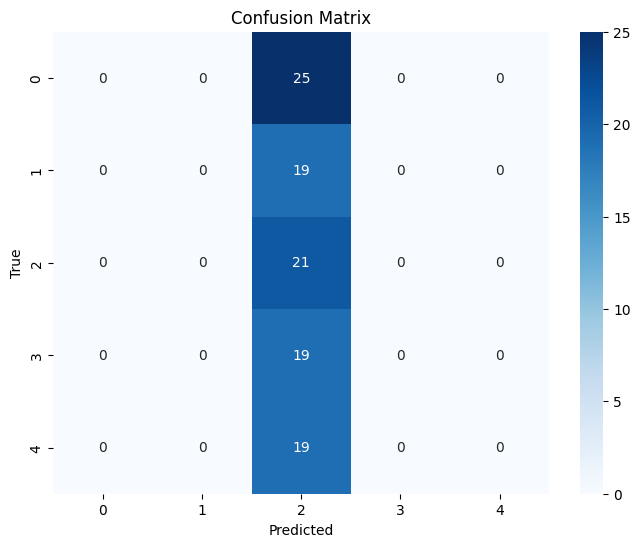

In [ ]:
from sklearn.metrics import confusion_matrix

# Get model predictions
valid_data.reset()  # Make sure to reset the generator for correct batch iteration
predictions = model.predict(valid_data, verbose=1)
predicted_classes = np.argmax(predictions, axis=1)

# Get the true class labels
true_classes = valid_data.classes

# Compute confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)

# Plot confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=valid_data.class_indices.keys(), yticklabels=valid_data.class_indices.keys())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [36]:
pip install streamlit tensorflow pillow boto3

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 60.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 41.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 6.3 MB/s eta 0:00:00


In [35]:
import tensorflow as tf

# Load the trained model
model = tf.keras.models.load_model("diabetic_retinopathy_model.keras")

/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 10 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [37]:
import streamlit as st
import tensorflow as tf
import numpy as np
from PIL import Image

# Load the trained model
model = tf.keras.models.load_model("diabetic_retinopathy_model.keras")

# Define the function to preprocess the image
def preprocess_image(image):
    image = image.resize((224, 224))  # Resize image
    image = np.array(image) / 255.0  # Normalize pixel values
    image = np.expand_dims(image, axis=0)  # Add batch dimension
    return image

# Streamlit UI
st.title("Diabetic Retinopathy Detection")
st.write("Upload a retinal image to classify the severity of diabetic retinopathy.")

# Upload Image
uploaded_file = st.file_uploader("Upload an image...", type=["jpg", "png", "jpeg"])

if uploaded_file is not None:
    # Display uploaded image
    image = Image.open(uploaded_file)
    st.image(image, caption="Uploaded Image", use_column_width=True)

    # Preprocess & Predict
    processed_image = preprocess_image(image)
    prediction = model.predict(processed_image)
    predicted_class = np.argmax(prediction)

    # Define class labels
    class_labels = ["No DR", "Mild", "Moderate", "Severe", "Proliferative DR"]

    # Show result
    st.write(f"### Prediction: {class_labels[predicted_class]}")

2025-02-18 04:44:43.151 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-18 04:44:44.012 
  command:

    streamlit run /usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2025-02-18 04:44:44.020 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-18 04:44:44.024 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-18 04:44:44.043 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-18 04:44:44.046 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-18 04:44:44.049 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-18 04:44:44.052 Thread 'MainThread': mi